## Import libraries and data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
df = pd.read_csv("./myntra_products_catalog 2.csv")

# add new column to cnovert INR -> USD 
df["Price (USD)"] = df["Price (INR)"] * 0.0125134

df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Price (USD)
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,146.969883
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,72.702854
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,11.249547
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,70.062527
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,9.497671


<AxesSubplot:xlabel='ProductBrand'>

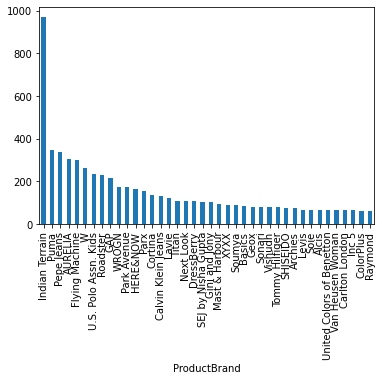

In [4]:
# new df of brand prodict count -> indian terrain has the most products
df1 = df.groupby('ProductBrand')['ProductID'].count().sort_values(ascending=False).head(40)

df1.plot.bar()

<AxesSubplot:xlabel='ProductBrand'>

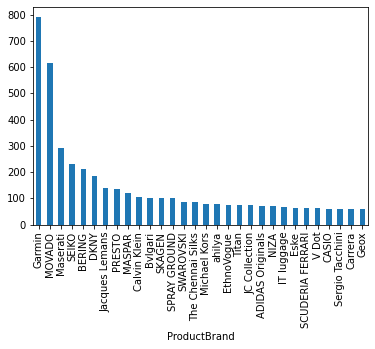

In [5]:
# group brand by price -> Gamrin has the highest average price 
df1=df.groupby('ProductBrand')['Price (USD)'].mean().sort_values(ascending=False).head(30)

df1.plot.bar()

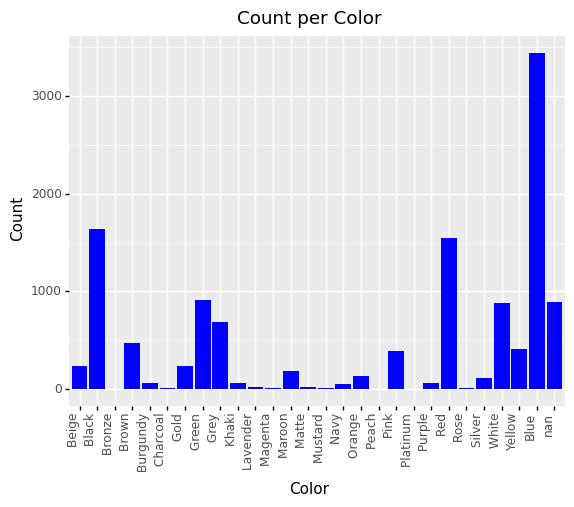

<ggplot: (8763858435506)>

In [6]:
ggplot(df, aes(x="PrimaryColor")) + geom_bar(fill='blue') + theme(axis_text_x  = element_text(angle = 90, hjust = 1)) + labs(x='Color', y='Count', title='Count per Color')

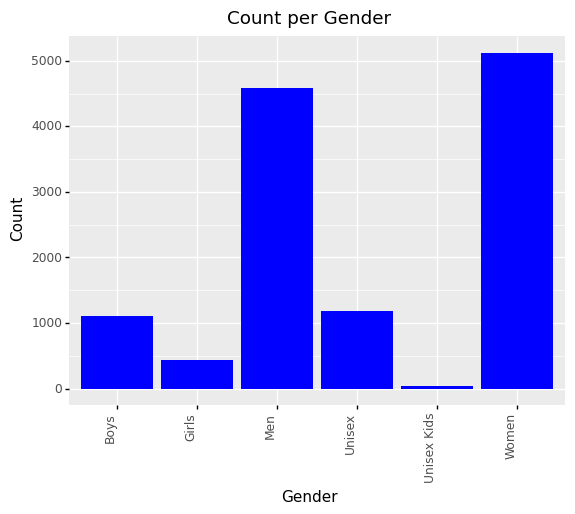

<ggplot: (8763858223743)>

In [7]:
ggplot(df, aes(x="Gender")) + geom_bar(fill='blue') + theme(axis_text_x  = element_text(angle = 90, hjust = 1)) + labs(x='Gender', y='Count', title='Count per Gender')

## NLP Anlysis to find trend

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string 
from wordcloud import WordCloud

list_stopwords = set(stopwords.words('english'))

In [9]:
# copy the original df 

df_nlp=df.copy()
df_nlp.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Price (USD)
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,146.969883
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,72.702854
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,11.249547
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,70.062527
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,9.497671


In [11]:
df_nlp['ProductName2'] = df_nlp['ProductName'].str.lower()
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(word_tokenize)
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x : [word for word in x if len(word) > 1])

In [12]:
df_nlp['Description'] = df_nlp['Description'].str.lower()
df_nlp['Description'] = df_nlp['Description'].apply(word_tokenize)
df_nlp['Description'] = df_nlp['Description'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['Description'] = df_nlp['Description'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['Description'] = df_nlp['Description'].apply(lambda x : [word for word in x if len(word) > 1])

In [13]:
df_nlp.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Price (USD),ProductName2
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"[black, grey, printed, medium, trolley, bag, s...",Black,146.969883,"[dkny, unisex, black, grey, printed, medium, t..."
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,"[beige, grey, made, measure, kurta, churidar, ...",Beige,72.702854,"[ethnovogue, women, beige, grey, made, measure..."
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,"[pink, coloured, wash, 5pocket, highrise, crop...",Pink,11.249547,"[spykar, women, pink, alexa, super, skinny, fi..."
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,"[blue, selfdesign, bandhgala, suitblue, selfde...",Blue,70.062527,"[raymond, men, blue, selfdesign, singlebreaste..."
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"[brown, offwhite, printed, casual, shirt, spre...",White,9.497671,"[parx, men, brown, offwhite, slim, fit, printe..."


In [14]:
df_product=df_nlp['ProductName2'].explode()
df_product=pd.DataFrame(df_product)

In [15]:
pd.set_option('display.max_rows', 150)

## Finding categories within the product descriptions

In [16]:
df_product.groupby('ProductName2')['ProductName2'].count().sort_values(ascending=False).head(150)

ProductName2
men              4433
women            3910
blue             3442
solid            3114
fit              3075
printed          2620
black            2008
shirt            1668
slim             1562
tshirt           1449
white            1416
navy             1405
casual           1372
jeans            1210
regular          1135
boys             1082
grey             1060
green            1007
indian            987
terrain           971
kurta             892
red               874
checked           787
polo              748
neck              746
round             703
pink              686
brown             656
design            639
look              637
stretchable       584
straight          572
top               570
yellow            565
striped           550
clean             531
midrise           517
dress             447
collar            424
beige             419
girls             419
trousers          418
set               417
formal            406
sneakers          3

## Trend in 'Shirt' category

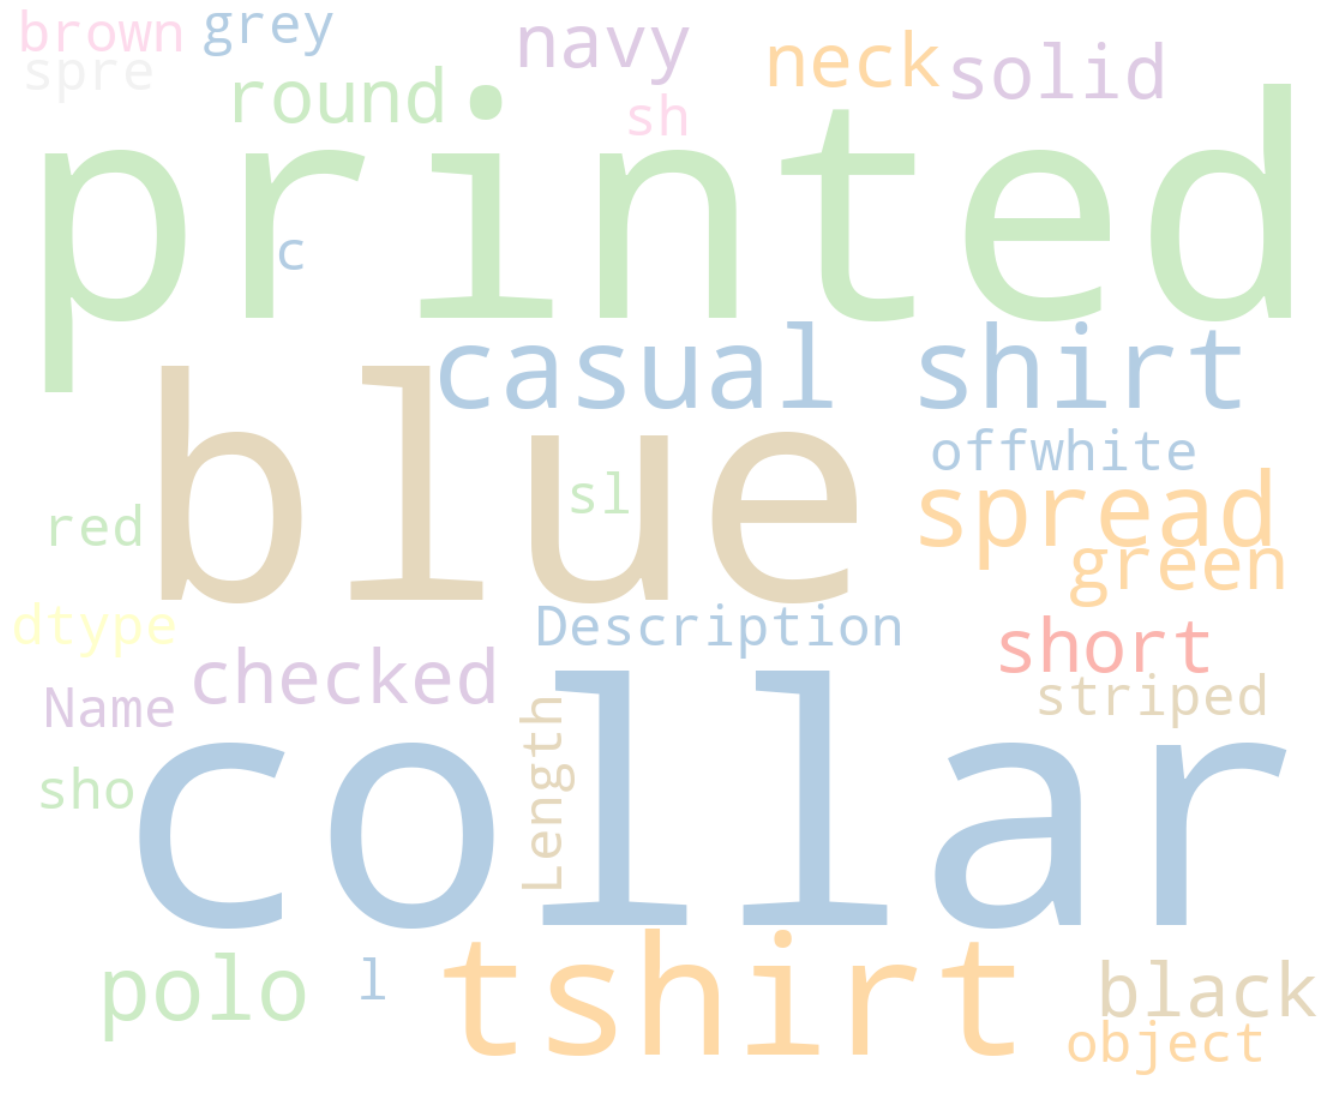

In [29]:
df_shirt=df_nlp[df_nlp['ProductName'].str.contains('shirt|Shirt')]
text1 = df_shirt['Description']
wordcloud = WordCloud(
    width = 1100,
    height = 900,
    colormap='Pastel1',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text1))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

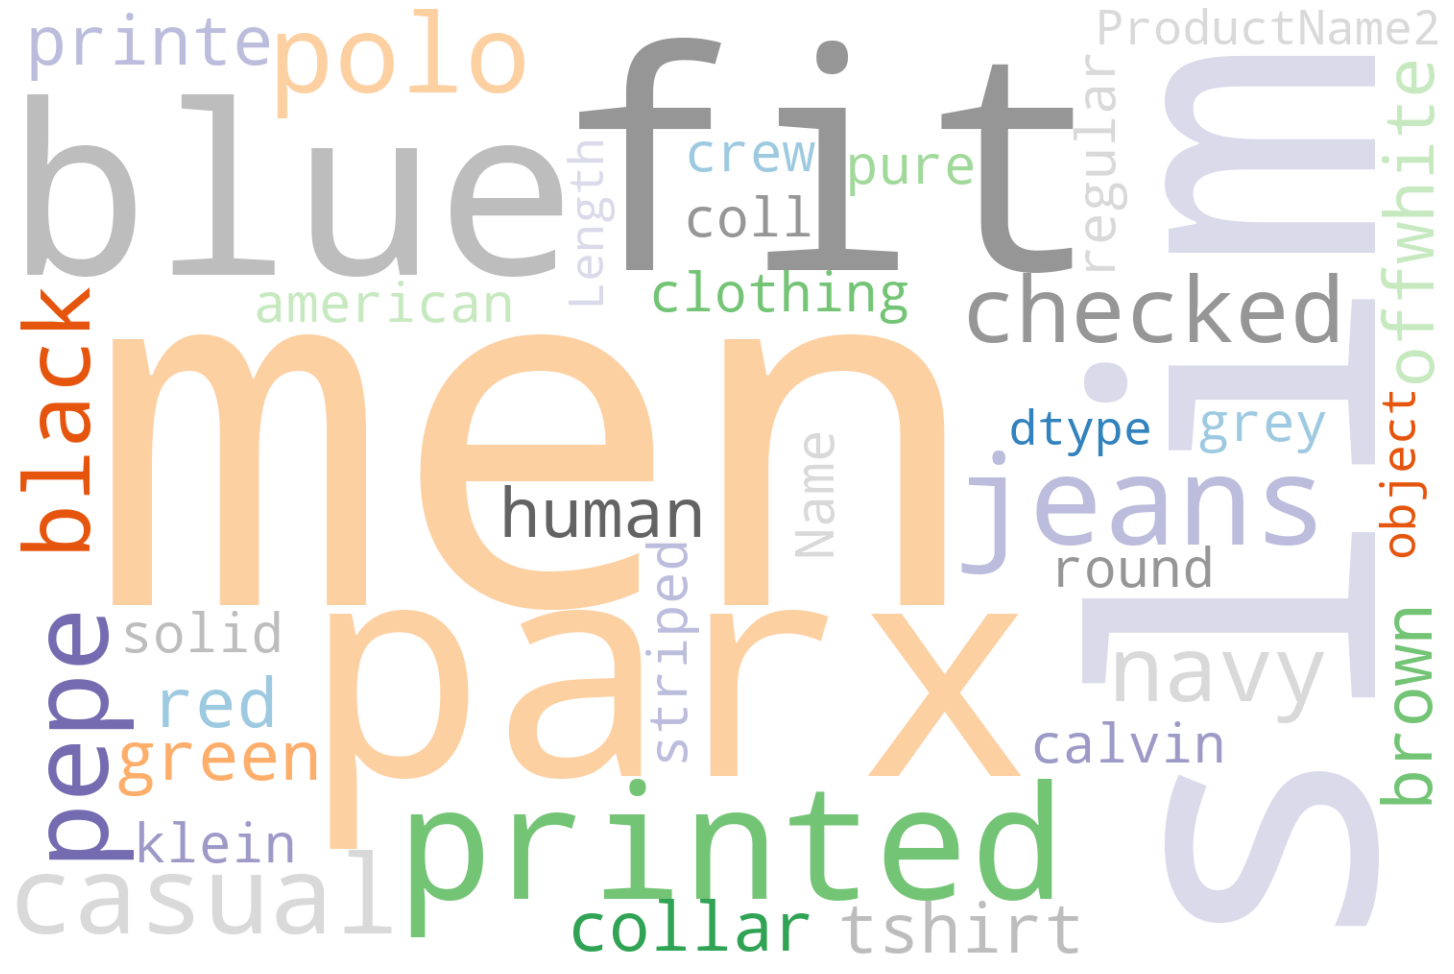

In [22]:
text1_2 = df_shirt['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='tab20c',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text1_2))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Trend in 'Jeans' category

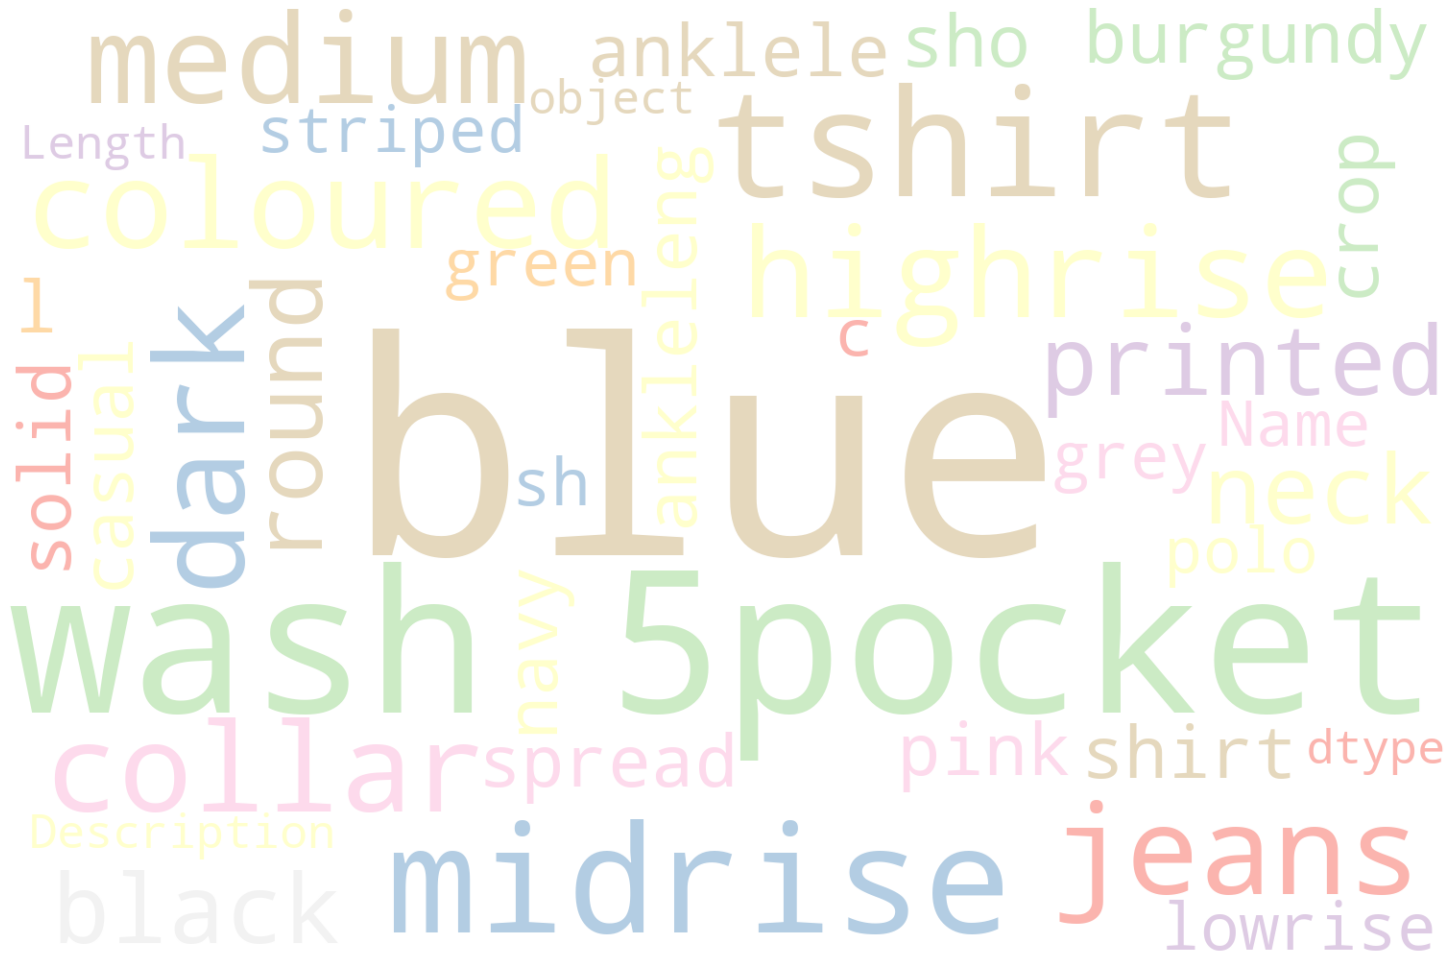

In [34]:
df_jean=df_nlp[df_nlp['ProductName'].str.contains('jeans|Jeans')]
text2 = df_jean['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Pastel1',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text2))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

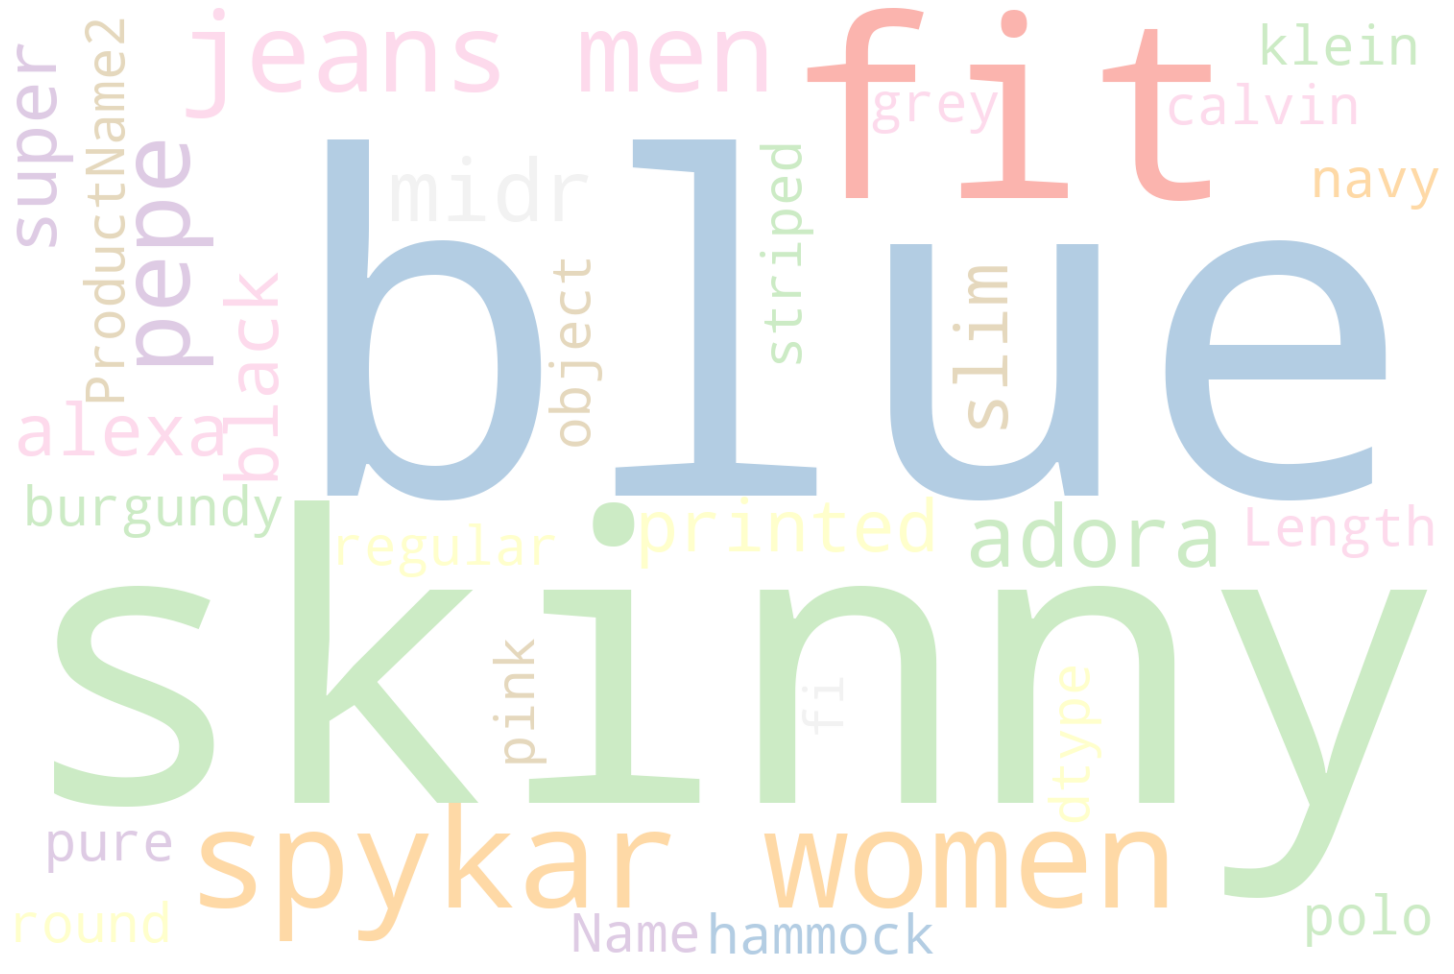

In [35]:
text2_2 = df_jean['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Pastel1',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text2_2))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Trend in 'Bag' category

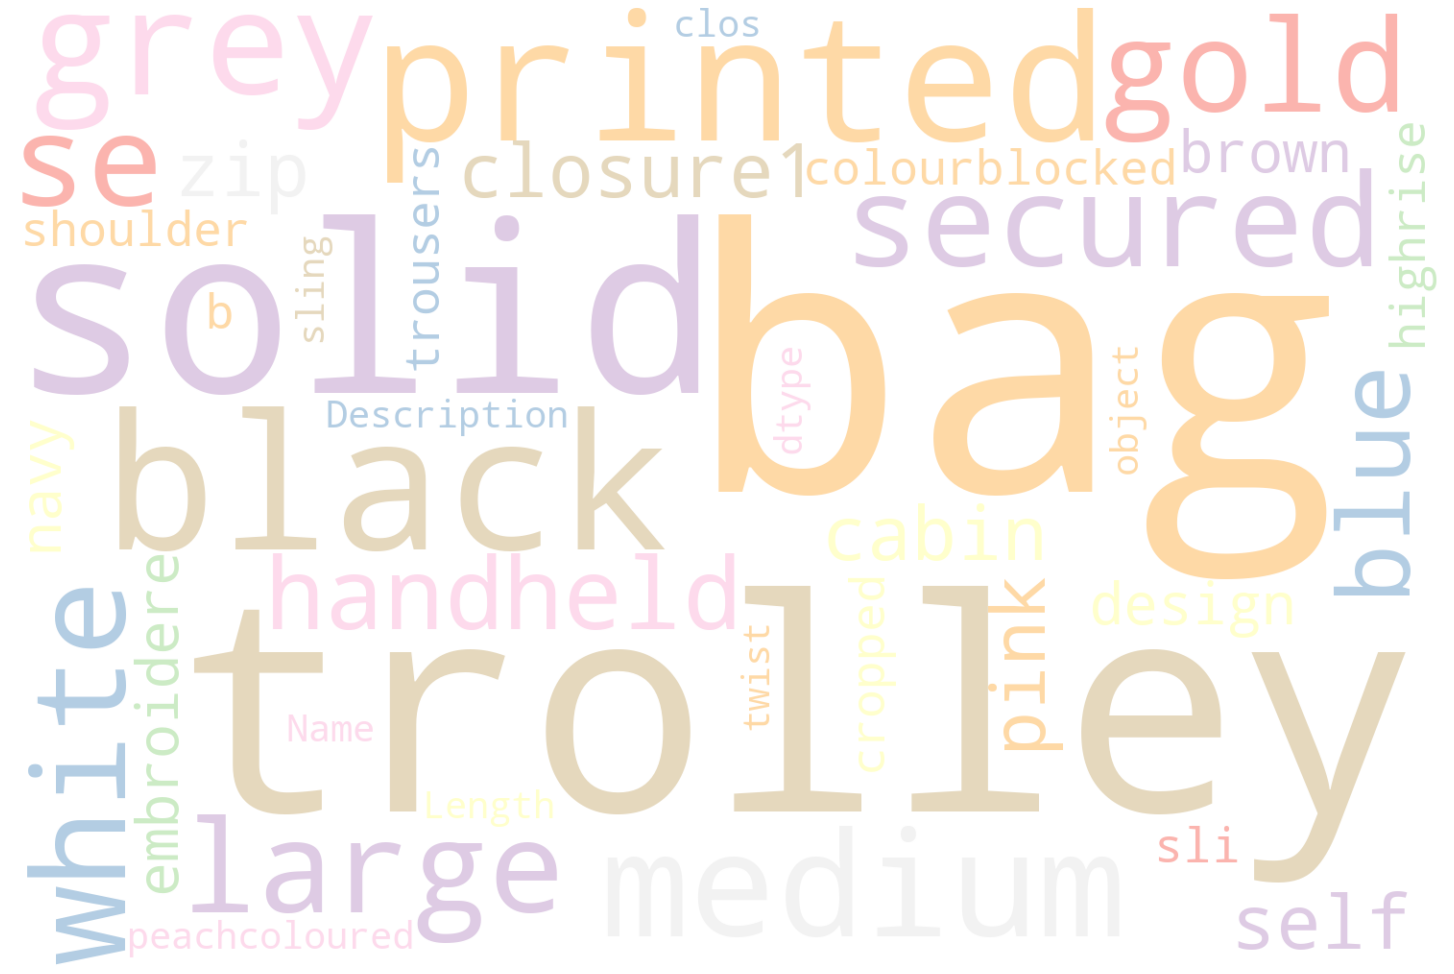

In [36]:
df_bag=df_nlp[df_nlp['ProductName'].str.contains('bag|Bag')]
text3 = df_bag['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Pastel1',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text3))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

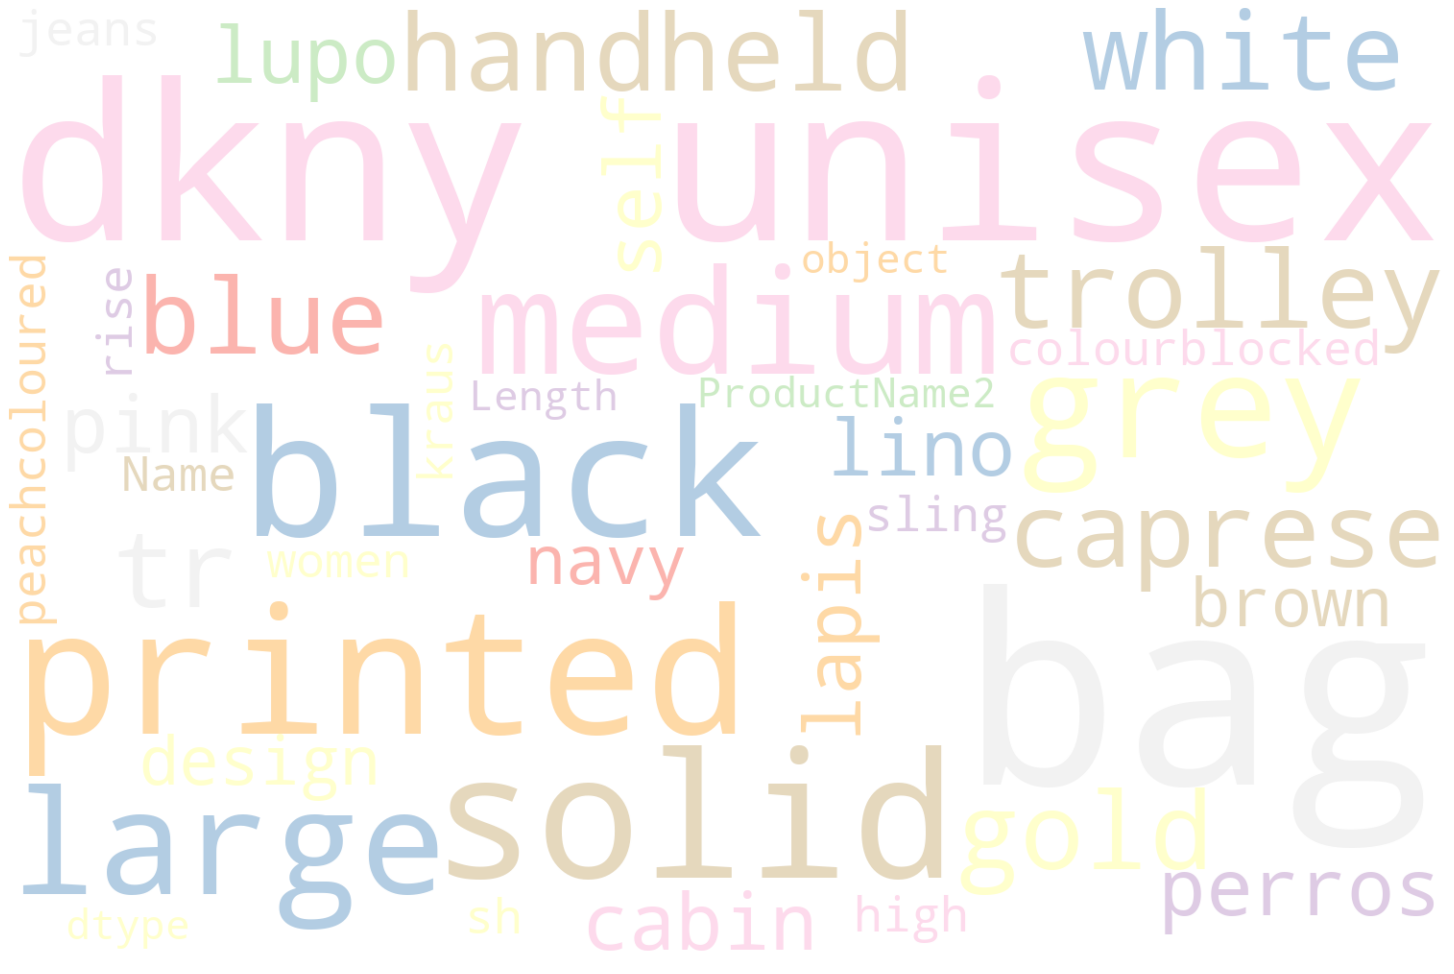

In [37]:
text3_2 = df_bag['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Pastel1',
    background_color = 'white',
    stopwords = list_stopwords).generate(str(text3_2))
fig = plt.figure(
    figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()